## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
flight1 = pd.read_csv('/Users/kamininayyar/Documents/GitHub/flight_delay.csv')
flight1.head(2)


,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,dep_delay,arr_delay,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,-2.0,25.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,-2.0,-12.0,0


In [3]:
flight1.shape

(786371, 7)

In [4]:
flight1.isnull().sum()

fl_date                   0
op_unique_carrier         0
crs_elapsed_time          0
actual_elapsed_time    1968
dep_delay               225
arr_delay              2099
flight_delay              0
dtype: int64

In [62]:
flight2=flight1.dropna()

In [63]:
flight2.shape

(784054, 7)

In [7]:
flight2.isnull().sum()

fl_date                0
op_unique_carrier      0
crs_elapsed_time       0
actual_elapsed_time    0
dep_delay              0
arr_delay              0
flight_delay           0
dtype: int64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
sns.set(rc={'figure.figsize':(25.0,10.0)})

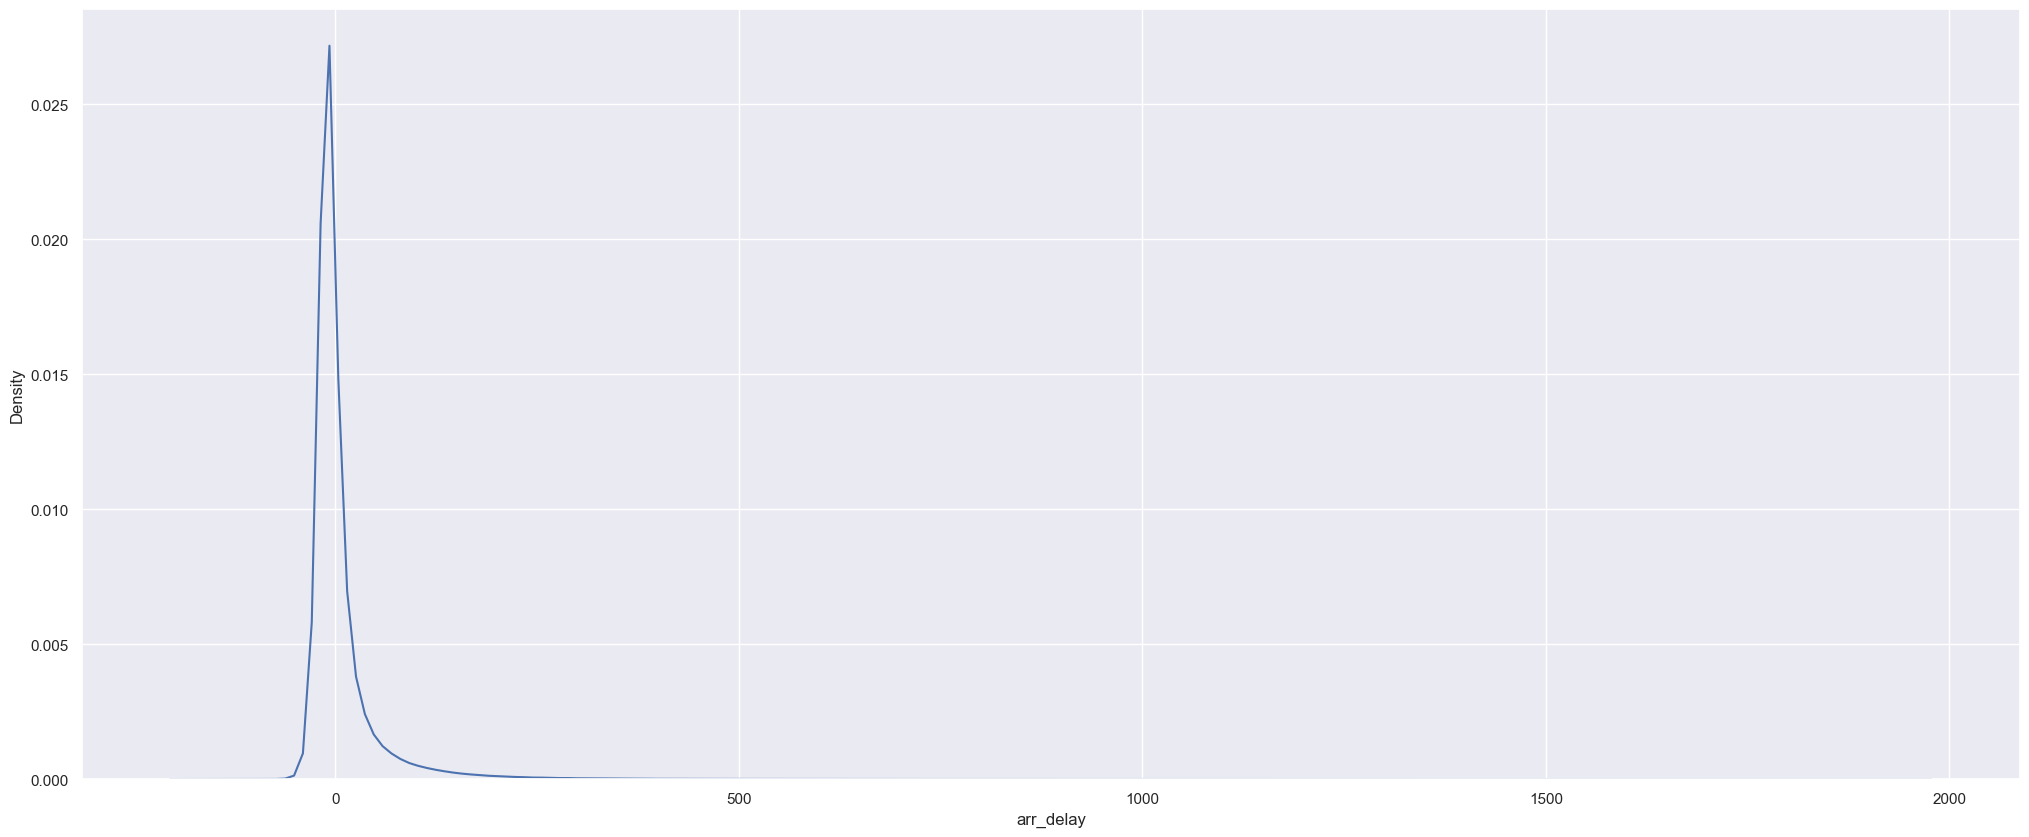

In [9]:
sns.kdeplot(data=flight2, x="arr_delay")
plt.show()

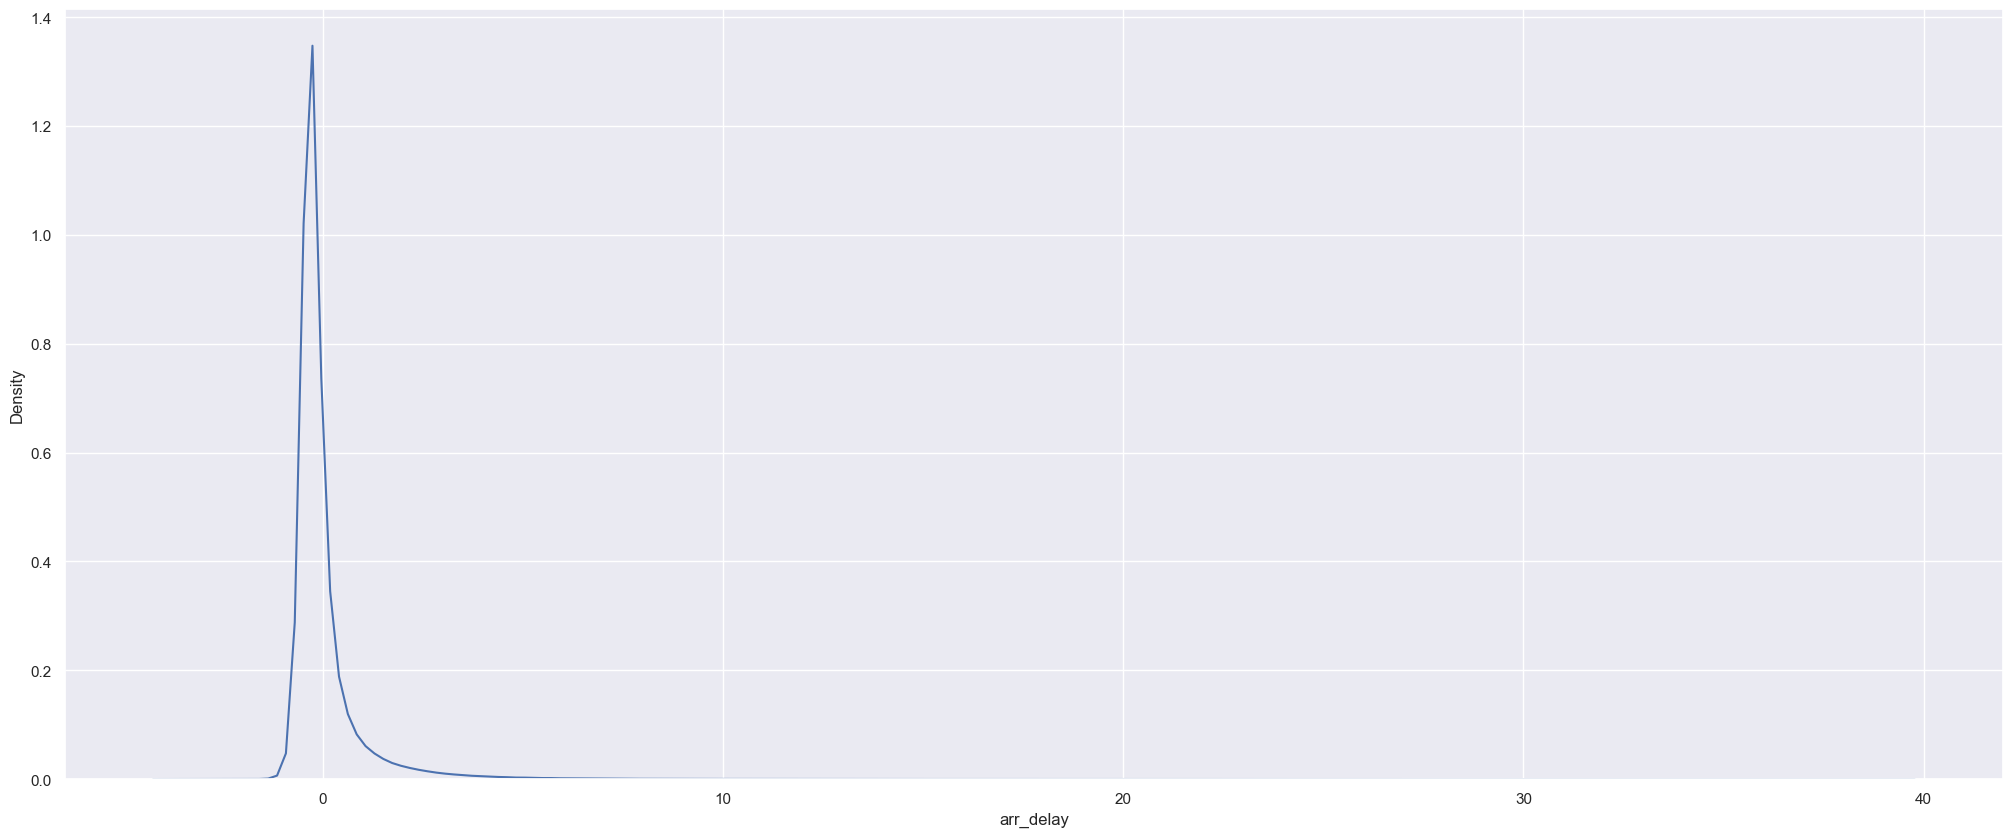

In [10]:

arr_delay_standardized = (flight2['arr_delay'] - flight2['arr_delay'].mean()) / flight2['arr_delay'].std()
sns.kdeplot(arr_delay_standardized)
plt.show()


In [11]:
print(arr_delay_standardized.mean(), arr_delay_standardized.std())


8.98053874276934e-17 0.9999999999993341


In [12]:
# shapiro test
from scipy import stats
stat, p = stats.shapiro(flight2['arr_delay'])# ran the test on dep_delay,flight_delay and arr_delay,
print('%0.30f' % p)


0.000000000000000000000000000000


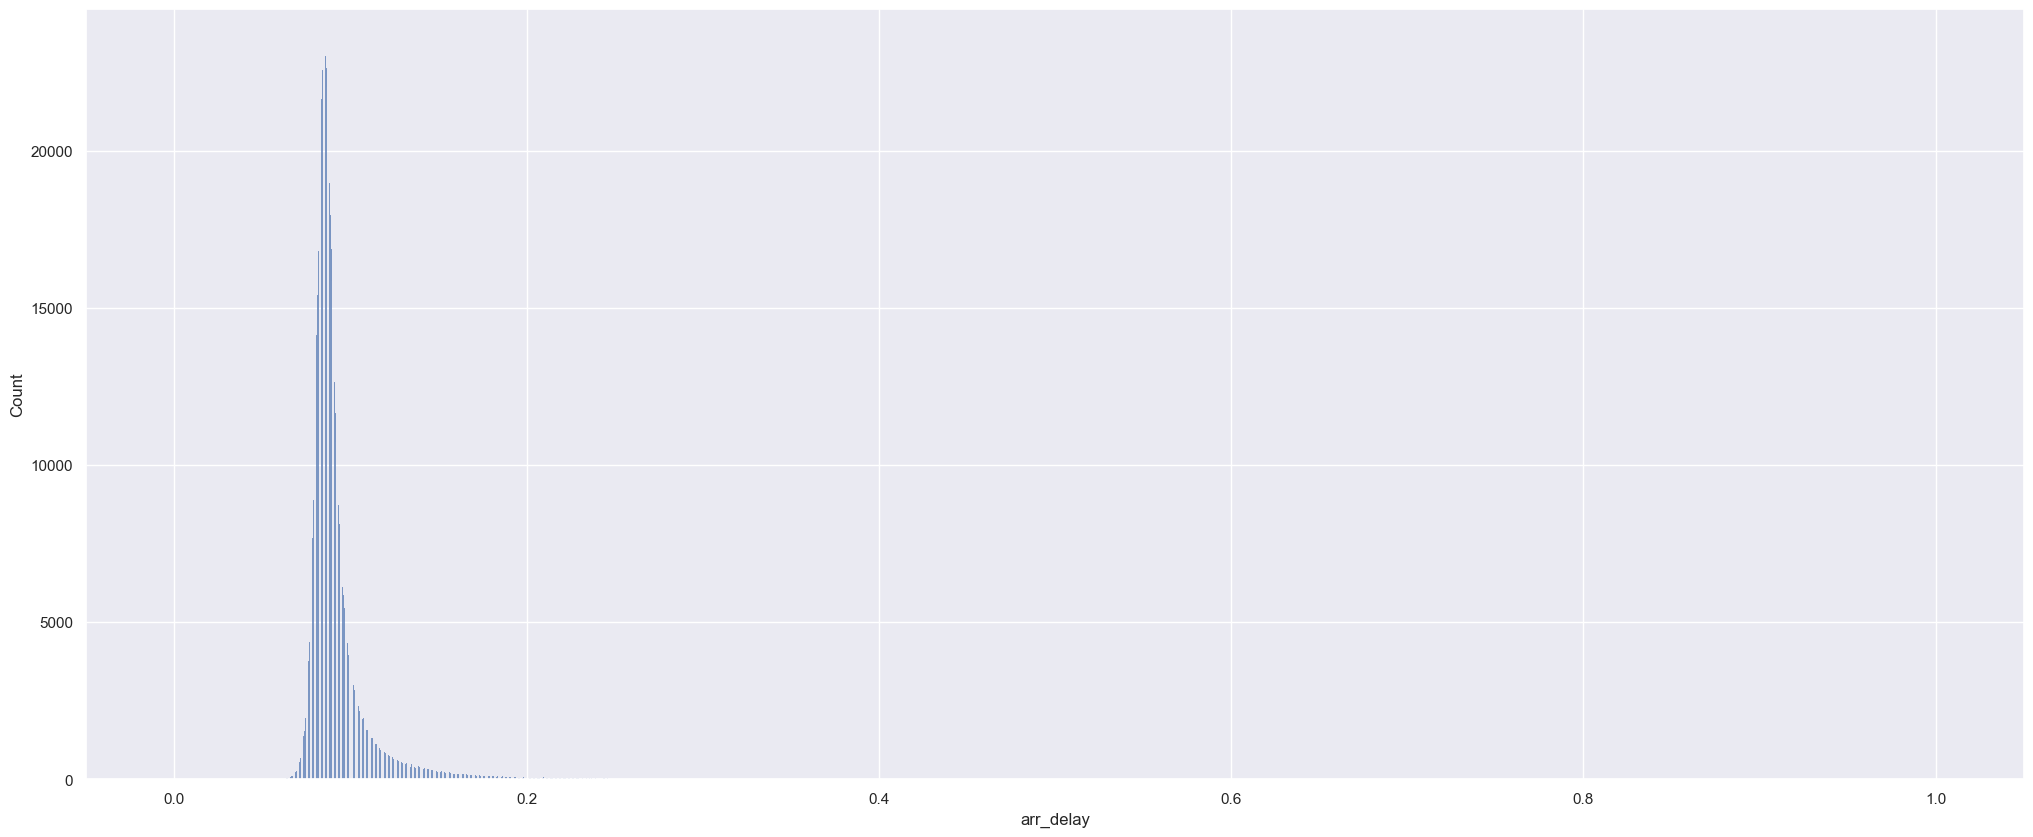

In [13]:
#conclusion data is not normalized
arr_delay_normalized = (flight2['arr_delay'] - flight2['arr_delay'].min()) / (flight2['arr_delay'].max() - flight2['arr_delay'].min())
sns.histplot(arr_delay_normalized)
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [14]:
flight2['MONTH'] = pd.DatetimeIndex(flight2['fl_date']).month
flight2.head(2)

,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,dep_delay,arr_delay,flight_delay,MONTH
0,2018-02-20,American AirlinesInc.,117,144.0,-2.0,25.0,1,2
1,2018-05-12,Delta Air Lines Inc.,124,114.0,-2.0,-12.0,0,5


In [15]:
import calendar
flight2['month_name']=flight2['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [16]:
flight2['month_name'].value_counts()

Jul    69802
Aug    69392
Jun    68083
Oct    67379
May    67342
Dec    66108
Mar    65920
Apr    64626
Sep    64158
Nov    64035
Jan    61118
Feb    56091
Name: month_name, dtype: int64

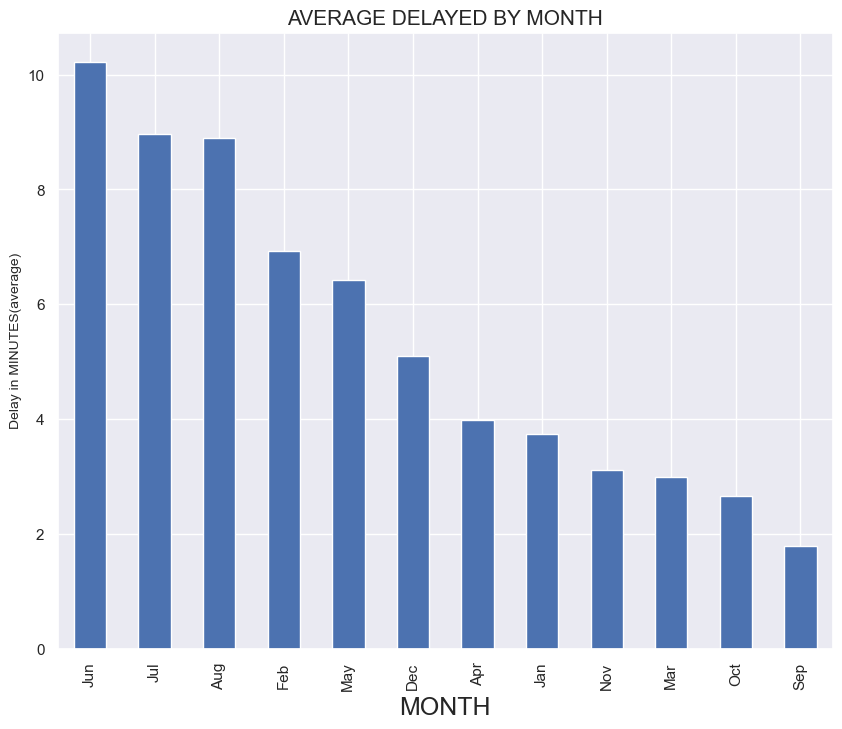

In [17]:
plt.figure(figsize=(10,8))
flight2.groupby('month_name').arr_delay.mean().sort_values(ascending=False).plot.bar()
plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
plt.xlabel('MONTH', fontsize=18)
plt.ylabel('Delay in MINUTES(average)', fontsize=10)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.show()

#### **Task 3**: What are the airlines that has the maximum and minimum delays?

In [18]:
full_flights_df=pd.read_csv('/Users/kamininayyar/Documents/GitHub/flight_dataframe.csv')
full_flights_df.head(2)

,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,92.0,"Atlanta, GA","Philadelphia, PA",830.0,-2.0,1024.0,-12.0,666,1013.0,841.0,11.0,11.0,0


In [19]:
airline_mm_delay=full_flights_df[['op_unique_carrier','flight_delay']]
airline_mm_delay.head(2)

,op_unique_carrier,flight_delay
0,American AirlinesInc.,1
1,Delta Air Lines Inc.,0


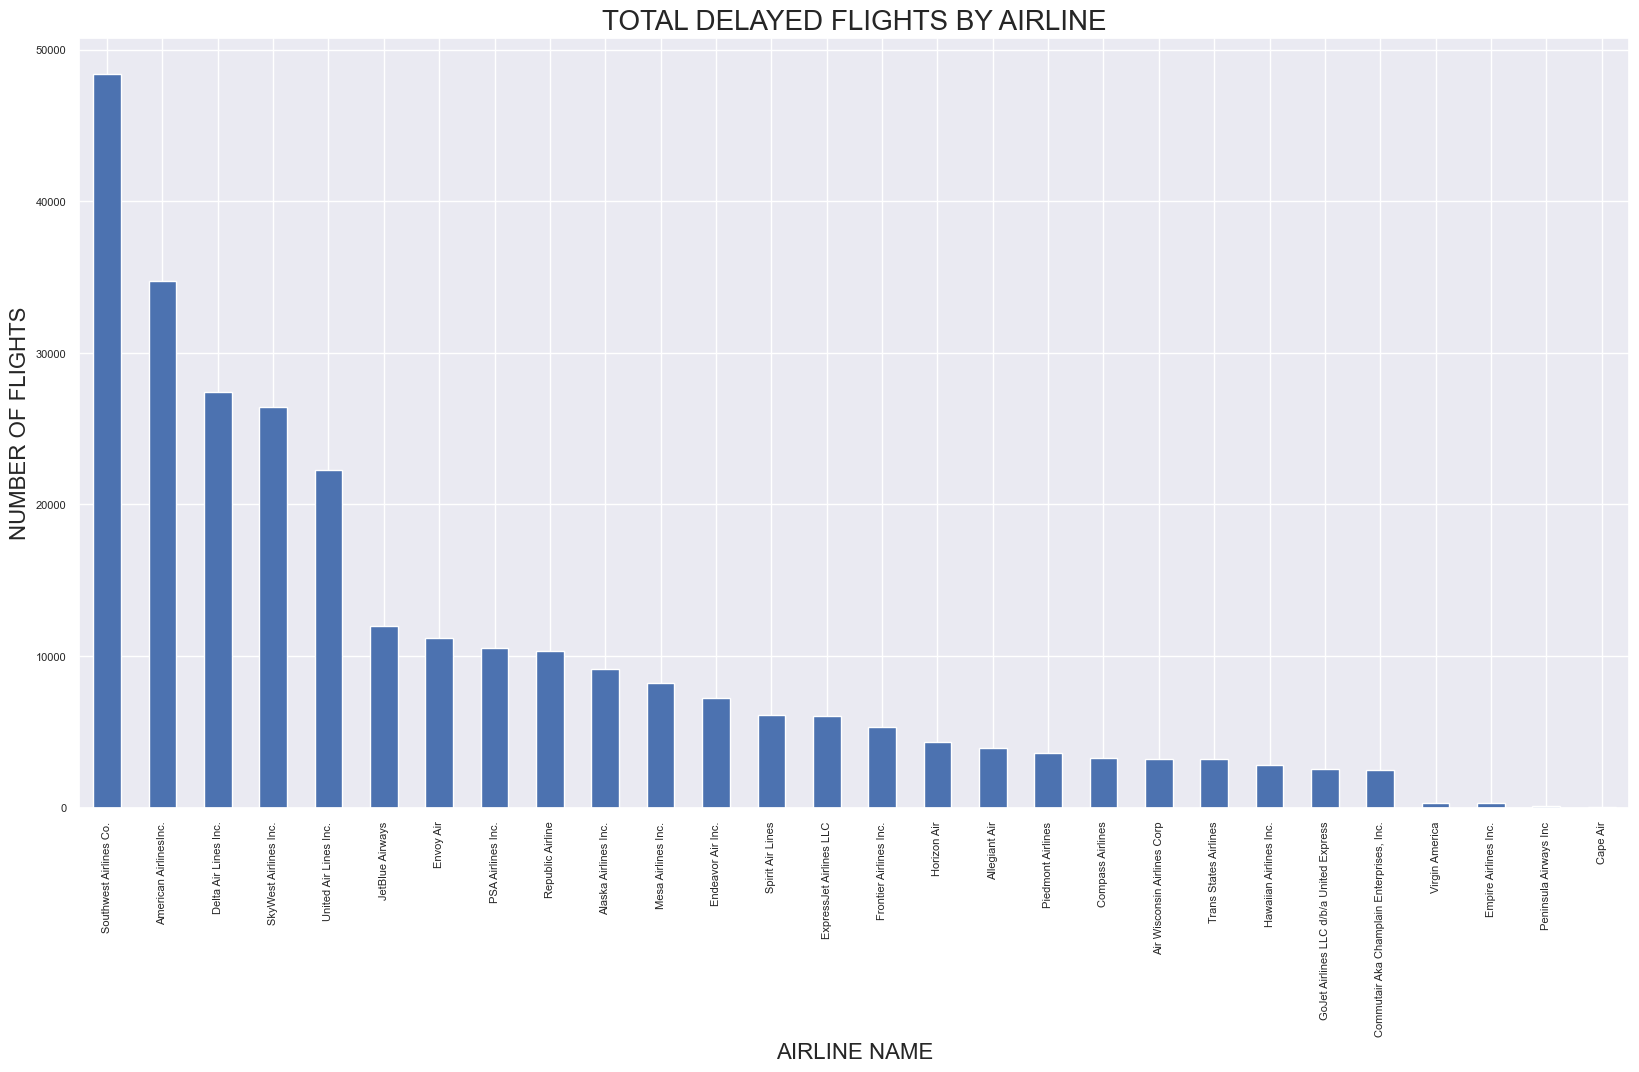

In [20]:
# TOTAL NO.OF FLIGHTS delayed BY EACH AIRLINE
# let's put it in a graph
plt.figure(figsize=(20, 10))
airline_mm_delay.groupby('op_unique_carrier').flight_delay.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()


In [21]:
mm_delay = airline_mm_delay.groupby('op_unique_carrier').flight_delay.sum().sort_values(ascending=False)
mm_delay.rename_axis('op_unique_carrier').reset_index(name='DELAYED_FLIGHTS')

,op_unique_carrier,DELAYED_FLIGHTS
0,Southwest Airlines Co.,48375
1,American AirlinesInc.,34739
2,Delta Air Lines Inc.,27400
3,SkyWest Airlines Inc.,26452
4,United Air Lines Inc.,22247
5,JetBlue Airways,11988
6,Envoy Air,11182
7,PSA Airlines Inc.,10503
8,Republic Airline,10342
9,Alaska Airlines Inc.,9150


In [22]:
mm1 = airline_mm_delay.op_unique_carrier.value_counts().rename_axis('op_unique_carrier').reset_index(name='total_flights')
mm1.head(10)

,op_unique_carrier,total_flights
0,Southwest Airlines Co.,133928
1,Delta Air Lines Inc.,96989
2,American AirlinesInc.,92063
3,SkyWest Airlines Inc.,79511
4,United Air Lines Inc.,62245
5,Republic Airline,31491
6,Envoy Air,30269
7,JetBlue Airways,29624
8,PSA Airlines Inc.,27399
9,Alaska Airlines Inc.,25377


In [23]:
final_mm_df=pd.merge(mm_delay,mm1, on='op_unique_carrier')
final_mm_df.head(10)

,op_unique_carrier,flight_delay,total_flights
0,Southwest Airlines Co.,48375,133928
1,American AirlinesInc.,34739,92063
2,Delta Air Lines Inc.,27400,96989
3,SkyWest Airlines Inc.,26452,79511
4,United Air Lines Inc.,22247,62245
5,JetBlue Airways,11988,29624
6,Envoy Air,11182,30269
7,PSA Airlines Inc.,10503,27399
8,Republic Airline,10342,31491
9,Alaska Airlines Inc.,9150,25377


In [24]:
# percentage of each airline delay
final_mm_df['flight_delay_percent_'] = round((final_mm_df['flight_delay']*100)/final_mm_df['total_flights'], 2)
final_mm_df.head(5)

,op_unique_carrier,flight_delay,total_flights,flight_delay_percent_
0,Southwest Airlines Co.,48375,133928,36.12
1,American AirlinesInc.,34739,92063,37.73
2,Delta Air Lines Inc.,27400,96989,28.25
3,SkyWest Airlines Inc.,26452,79511,33.27
4,United Air Lines Inc.,22247,62245,35.74


In [25]:
df=final_mm_df.groupby('op_unique_carrier').flight_delay_percent_.sum().sort_values(ascending=False).reset_index()
df.head(5)

,op_unique_carrier,flight_delay_percent_
0,Peninsula Airways Inc,61.79
1,"Commutair Aka Champlain Enterprises, Inc.",48.30
2,Frontier Airlines Inc.,41.76
3,Trans States Airlines,41.39
4,JetBlue Airways,40.47


In [26]:
## observation:


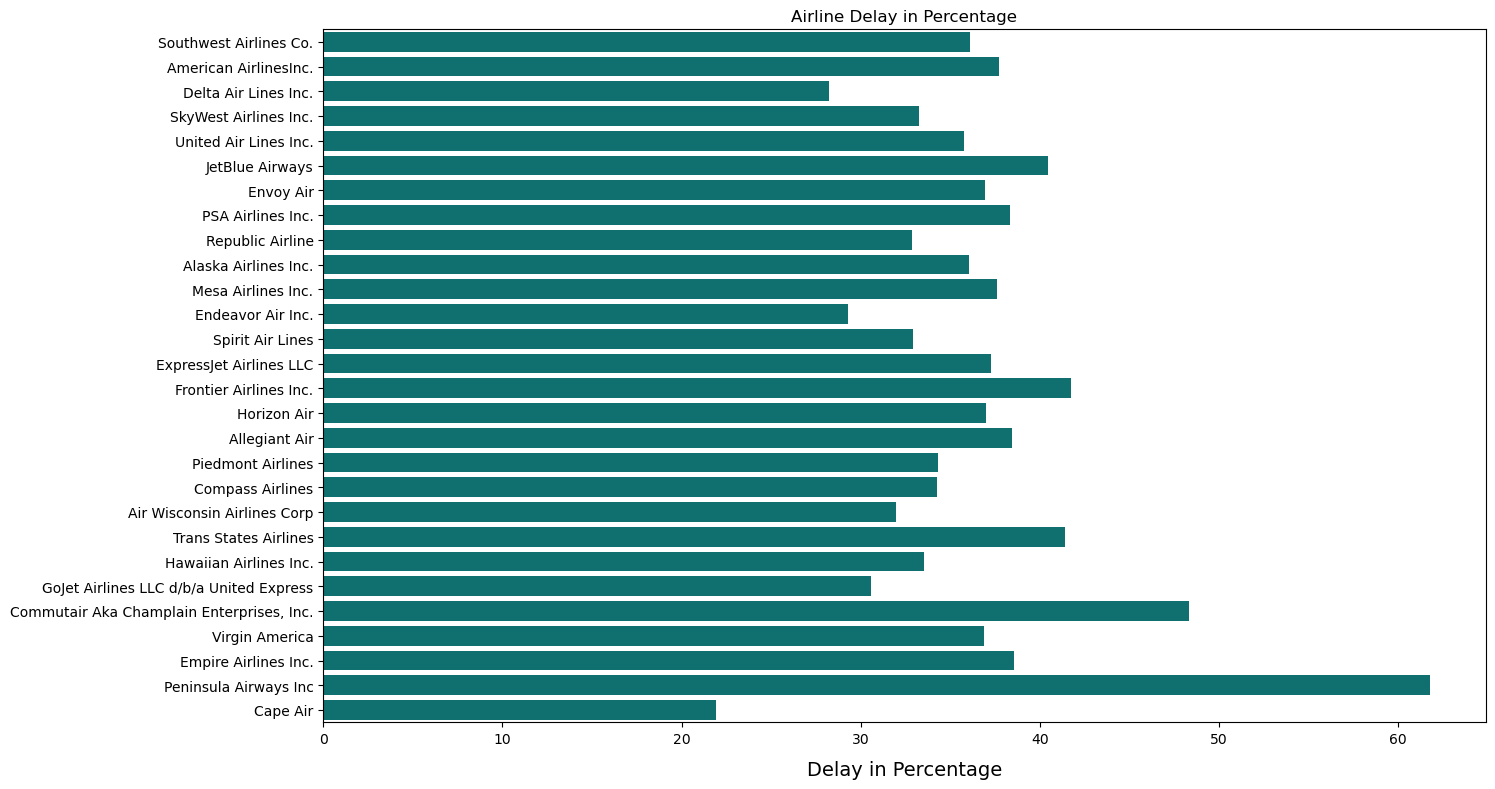

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)
 
fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="flight_delay_percent_", y="op_unique_carrier", data=final_mm_df, color="teal", ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Airline Delay in Percentage')
plt.xlabel('Delay in Percentage', fontsize=14, labelpad=10);
plt.show()

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [28]:
full_flights_df=pd.read_csv('/Users/kamininayyar/Documents/GitHub/flight_dataframe.csv')
full_flights_df.head(2)

,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,92.0,"Atlanta, GA","Philadelphia, PA",830.0,-2.0,1024.0,-12.0,666,1013.0,841.0,11.0,11.0,0


In [29]:
# testing code with example
variable = 443.0
string_variable = str(variable)
print(string_variable)

443.0


In [30]:
new_vari = string_variable[0:-4]
print(new_vari)

4


In [78]:
taxi_df= full_flights_df[['fl_date', 'op_unique_carrier','dep_time','arr_time','origin_city_name','dest_city_name','taxi_out','taxi_in','dep_delay','arr_delay']]
taxi_df.head(2)

,fl_date,op_unique_carrier,dep_time,arr_time,origin_city_name,dest_city_name,taxi_out,taxi_in,dep_delay,arr_delay
0,2018-02-20,American AirlinesInc.,1443.0,1607.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",25.0,9.0,-2.0,25.0
1,2018-05-12,Delta Air Lines Inc.,830.0,1024.0,"Atlanta, GA","Philadelphia, PA",11.0,11.0,-2.0,-12.0


In [79]:
taxi_df.dtypes

fl_date               object
op_unique_carrier     object
dep_time             float64
arr_time             float64
origin_city_name      object
dest_city_name        object
taxi_out             float64
taxi_in              float64
dep_delay            float64
arr_delay            float64
dtype: object

In [80]:
taxi_df['dep_time'] = round((taxi_df.dep_time/100))

,fl_date,op_unique_carrier,dep_time,arr_time,origin_city_name,dest_city_name,taxi_out,taxi_in,dep_delay,arr_delay
0,2018-02-20,American AirlinesInc.,14.0,1607.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",25.0,9.0,-2.0,25.0
1,2018-05-12,Delta Air Lines Inc.,8.0,1024.0,"Atlanta, GA","Philadelphia, PA",11.0,11.0,-2.0,-12.0


In [81]:
taxi_df['arr_time']= round((taxi_df.arr_time/100))

In [83]:
taxi_df.head()

,fl_date,op_unique_carrier,dep_time,arr_time,origin_city_name,dest_city_name,taxi_out,taxi_in,dep_delay,arr_delay
0,2018-02-20,American AirlinesInc.,14.0,16.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",25.0,9.0,-2.0,25.0
1,2018-05-12,Delta Air Lines Inc.,8.0,10.0,"Atlanta, GA","Philadelphia, PA",11.0,11.0,-2.0,-12.0
2,2018-07-11,Piedmont Airlines,9.0,10.0,"Philadelphia, PA","Charlottesville, VA",17.0,3.0,-4.0,-17.0
3,2018-08-07,Spirit Air Lines,18.0,20.0,"Atlanta, GA","Las Vegas, NV",25.0,6.0,30.0,36.0
4,2019-06-19,United Air Lines Inc.,19.0,22.0,"Newark, NJ","Los Angeles, CA",42.0,7.0,55.0,51.0


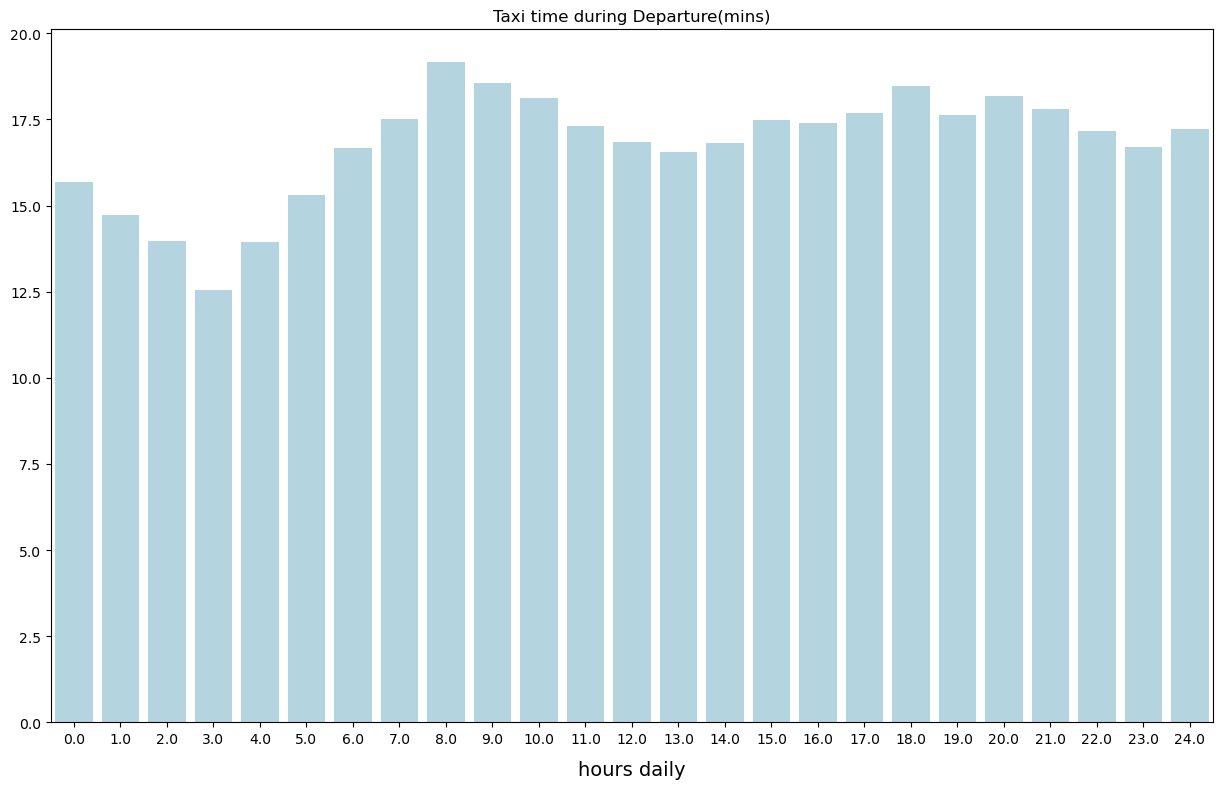

In [85]:
mpl.rcParams.update(mpl.rcParamsDefault)
 
fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="dep_time", y="taxi_out", data=taxi_df, color="lightblue", ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Taxi time during Departure(mins)')
plt.xlabel('hours daily', fontsize=14, labelpad=10);
plt.show()

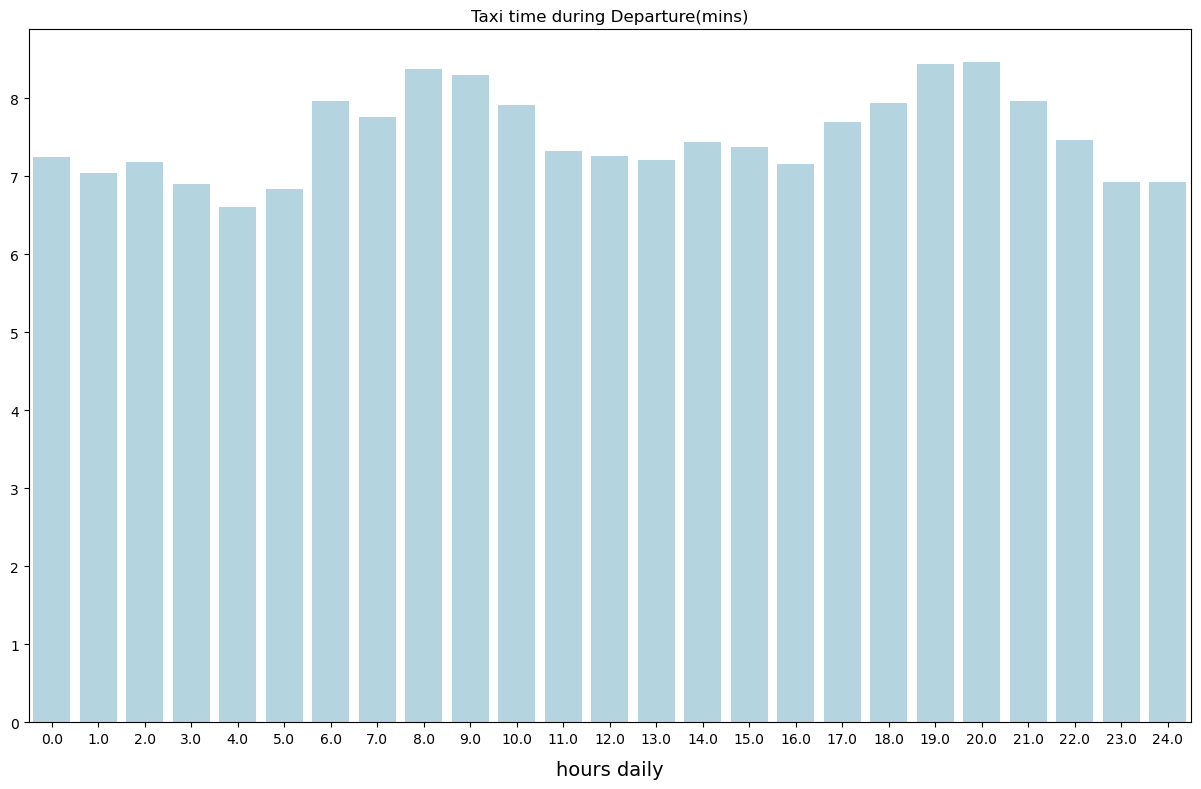

In [86]:
mpl.rcParams.update(mpl.rcParamsDefault)
 
fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="arr_time", y="taxi_in", data=taxi_df, color="lightblue", ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Taxi time during Departure(mins)')
plt.xlabel('hours daily', fontsize=14, labelpad=10);
plt.show()

In [ ]:
# looks like mornings 8-10 and evenings 6-9 are busy during both departures and arrivals

#### **Task 6**: How many states cover 50% of US air traffic? 

In [33]:
full_flights_df=pd.read_csv('/Users/kamininayyar/Documents/GitHub/flight_dataframe.csv')
full_flights_df.head(1)

,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1


In [34]:
us_cities= full_flights_df[['fl_date', 'op_unique_carrier','origin_city_name','dest_city_name','dep_delay','arr_delay']]
us_cities.head(2)

,fl_date,op_unique_carrier,origin_city_name,dest_city_name,dep_delay,arr_delay
0,2018-02-20,American AirlinesInc.,"Dallas/Fort Worth, TX","Colorado Springs, CO",-2.0,25.0
1,2018-05-12,Delta Air Lines Inc.,"Atlanta, GA","Philadelphia, PA",-2.0,-12.0


In [35]:
us_cities[['origin_City', 'origin_State']] = us_cities['origin_city_name'].str.split(',', n=1, expand=True)

In [36]:
us_cities[['dest_City', 'dest_State']] = us_cities['dest_city_name'].str.split(',', n=1, expand=True)

In [37]:
us_cities.head(2)

,fl_date,op_unique_carrier,origin_city_name,dest_city_name,dep_delay,arr_delay,origin_City,origin_State,dest_City,dest_State
0,2018-02-20,American AirlinesInc.,"Dallas/Fort Worth, TX","Colorado Springs, CO",-2.0,25.0,Dallas/Fort Worth,TX,Colorado Springs,CO
1,2018-05-12,Delta Air Lines Inc.,"Atlanta, GA","Philadelphia, PA",-2.0,-12.0,Atlanta,GA,Philadelphia,PA


In [38]:
us_state=us_cities.drop(['origin_city_name','dest_city_name','origin_City','dest_City'], axis=1)
us_state.head(2)

,fl_date,op_unique_carrier,dep_delay,arr_delay,origin_State,dest_State
0,2018-02-20,American AirlinesInc.,-2.0,25.0,TX,CO
1,2018-05-12,Delta Air Lines Inc.,-2.0,-12.0,GA,PA


In [39]:
check1 = us_state.dest_State.value_counts().rename_axis('dest').reset_index(name='FLIGHTS').iloc[0:50]
check1.head(5)

,dest,FLIGHTS
0,CA,86309
1,TX,77639
2,FL,57482
3,IL,49133
4,GA,41963


In [40]:
check2=us_state.origin_State.value_counts().rename_axis('origin').reset_index(name='FLIGHTS').iloc[0:50]
check2.head(5)


,origin,FLIGHTS
0,CA,86061
1,TX,77516
2,FL,57026
3,IL,49198
4,GA,41771


In [41]:
print("Percentage of TRAFFIC- dest:",(us_state.dest_State.value_counts()*100/len(us_state)))


Percentage of TRAFFIC- dest:  CA    10.975608
 TX     9.873075
 FL     7.309781
 IL     6.248069
 GA     5.336285
 NY     5.106877
 NC     4.606350
 CO     3.939871
 PA     2.944157
 WA     2.932331
 DC     2.927117
 MI     2.839754
 AZ     2.600554
 NV     2.414255
 OH     2.274626
 MN     2.178107
 NJ     2.070270
 MA     1.931277
 MO     1.826873
 TN     1.733151
 UT     1.583604
 HI     1.537061
 OR     1.430114
 MD     1.348473
 LA     1.067562
 VA     0.945864
 IN     0.904026
 WI     0.893344
 SC     0.853668
 OK     0.576318
 AL     0.555082
 AK     0.533463
 KY     0.519729
 ID     0.431603
 NE     0.420285
 AR     0.417487
 NM     0.404771
 IA     0.397649
 CT     0.385441
 MT     0.376540
 PR     0.365476
 ND     0.275570
 RI     0.261454
 ME     0.257131
 KS     0.213385
 MS     0.192021
 SD     0.190622
 NH     0.148022
 VT     0.143825
 WY     0.123606
 WV     0.102750
 VI     0.050994
 TT     0.024670
Name: dest_State, dtype: float64


#### **Task 7**: Whether planes fly faster when there is the departure delay? Are airlines able to lower the delay during the flights?

In [42]:
que7 = full_flights_df[['op_unique_carrier','dep_time','dep_delay','arr_time','arr_delay','distance']]
que7.head(5)

,op_unique_carrier,dep_time,dep_delay,arr_time,arr_delay,distance
0,American AirlinesInc.,1443.0,-2.0,1607.0,25.0,592
1,Delta Air Lines Inc.,830.0,-2.0,1024.0,-12.0,666
2,Piedmont Airlines,917.0,-4.0,1020.0,-17.0,210
3,Spirit Air Lines,1840.0,30.0,1956.0,36.0,1747
4,United Air Lines Inc.,1855.0,55.0,2155.0,51.0,2454


In [43]:
que7['total_delay'] = que7['arr_delay'] - que7['dep_delay']

In [44]:
que7.head()

,op_unique_carrier,dep_time,dep_delay,arr_time,arr_delay,distance,total_delay
0,American AirlinesInc.,1443.0,-2.0,1607.0,25.0,592,27.0
1,Delta Air Lines Inc.,830.0,-2.0,1024.0,-12.0,666,-10.0
2,Piedmont Airlines,917.0,-4.0,1020.0,-17.0,210,-13.0
3,Spirit Air Lines,1840.0,30.0,1956.0,36.0,1747,6.0
4,United Air Lines Inc.,1855.0,55.0,2155.0,51.0,2454,-4.0


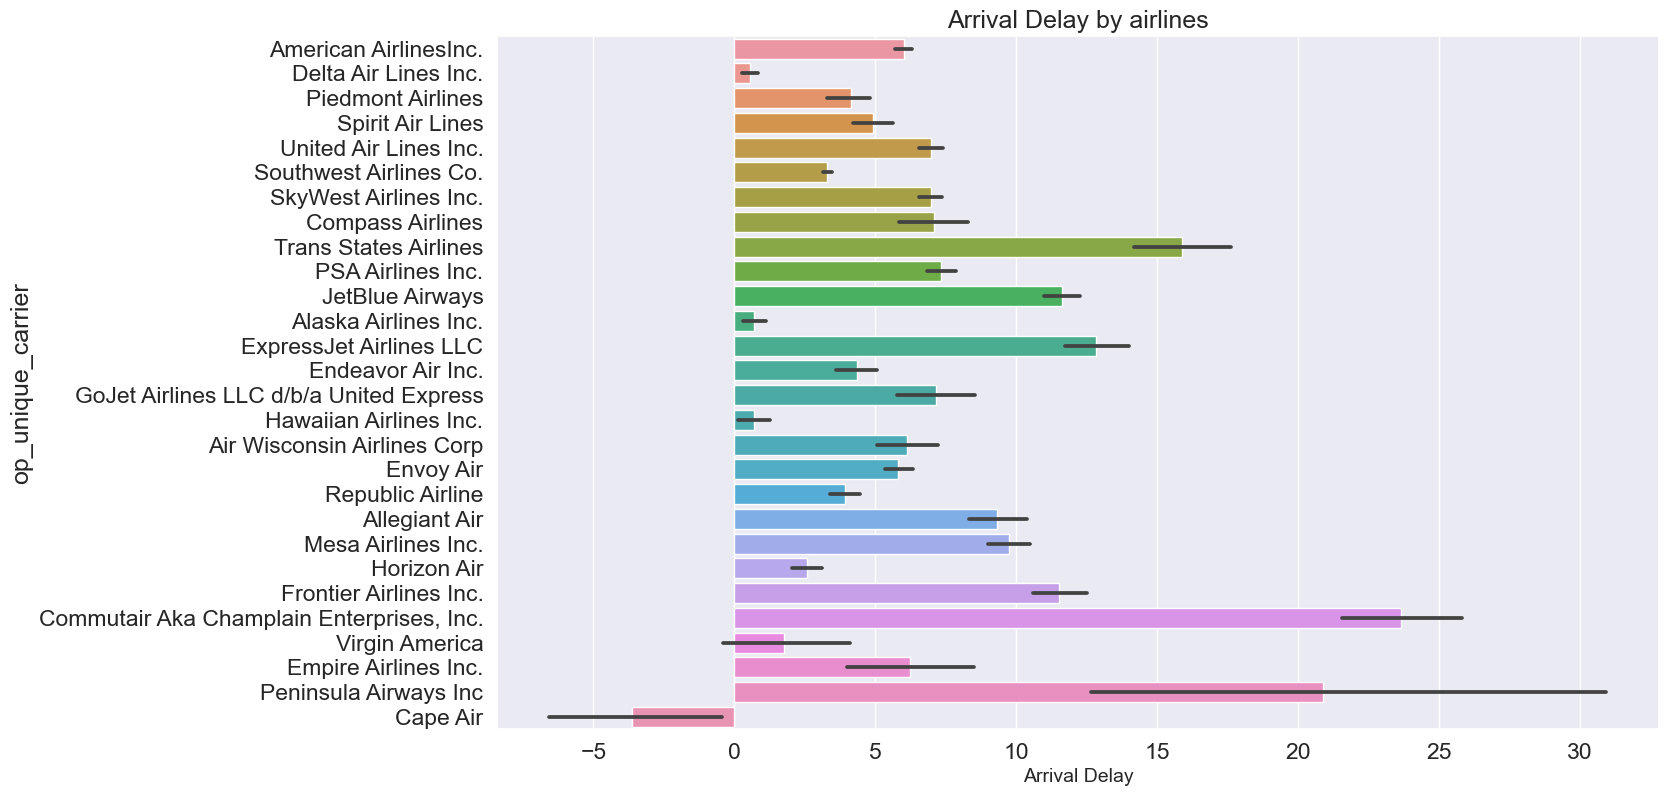

In [45]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.5)
ax = sns.barplot(x='arr_delay', y='op_unique_carrier', data=que7)
ax.set_title('Arrival Delay by airlines', fontsize=18)
ax.set_xlabel('Arrival Delay', fontsize=14)
plt.show()

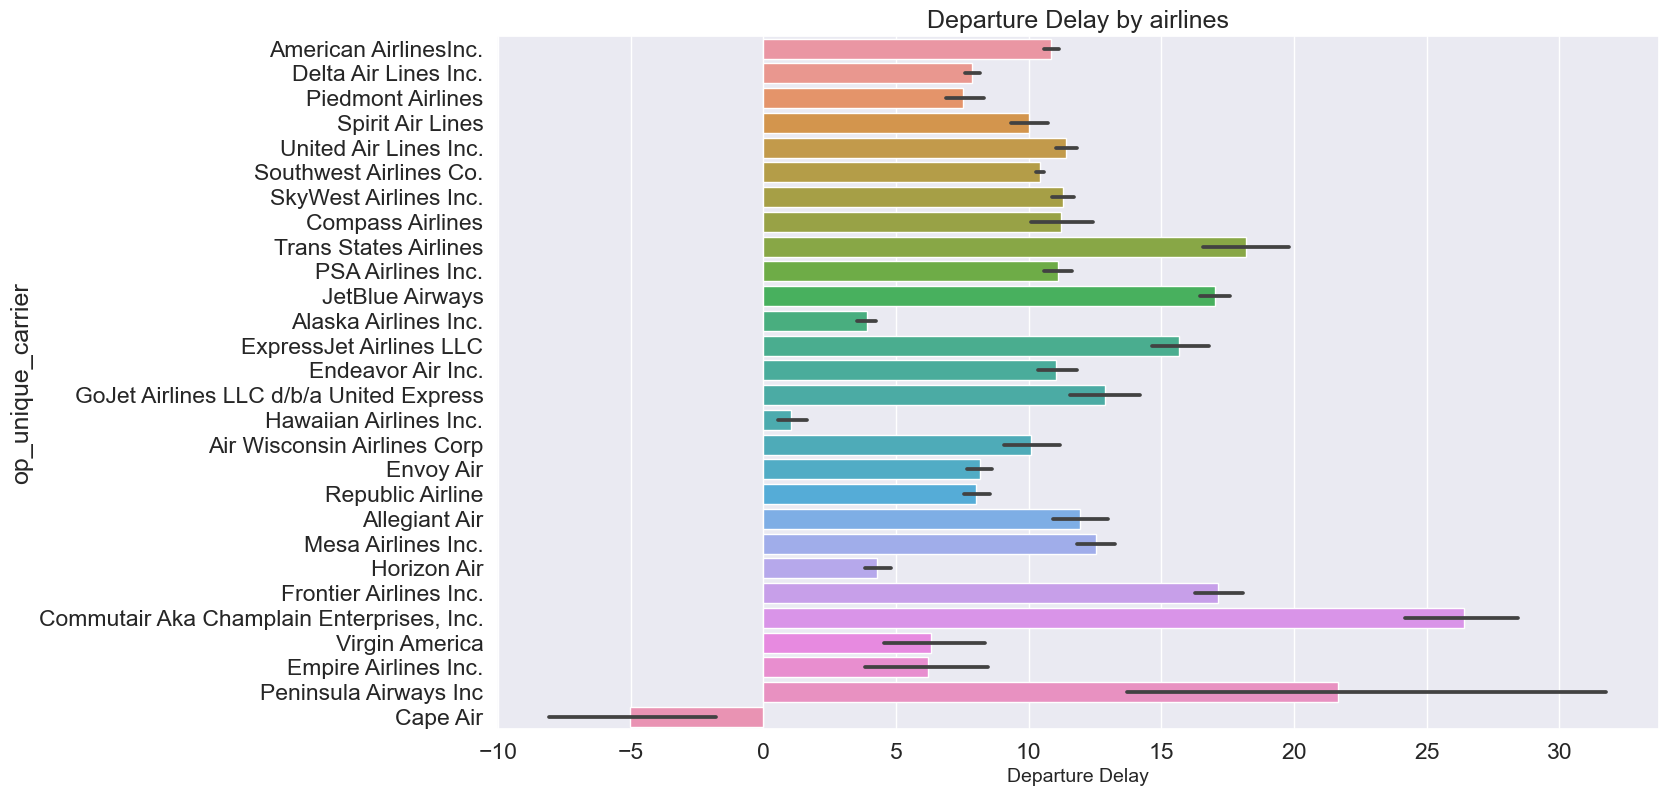

In [46]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.5)
ax = sns.barplot(x='dep_delay', y='op_unique_carrier', data=que7)
ax.set_title('Departure Delay by airlines', fontsize=18)
ax.set_xlabel('Departure Delay', fontsize=14)
plt.show()

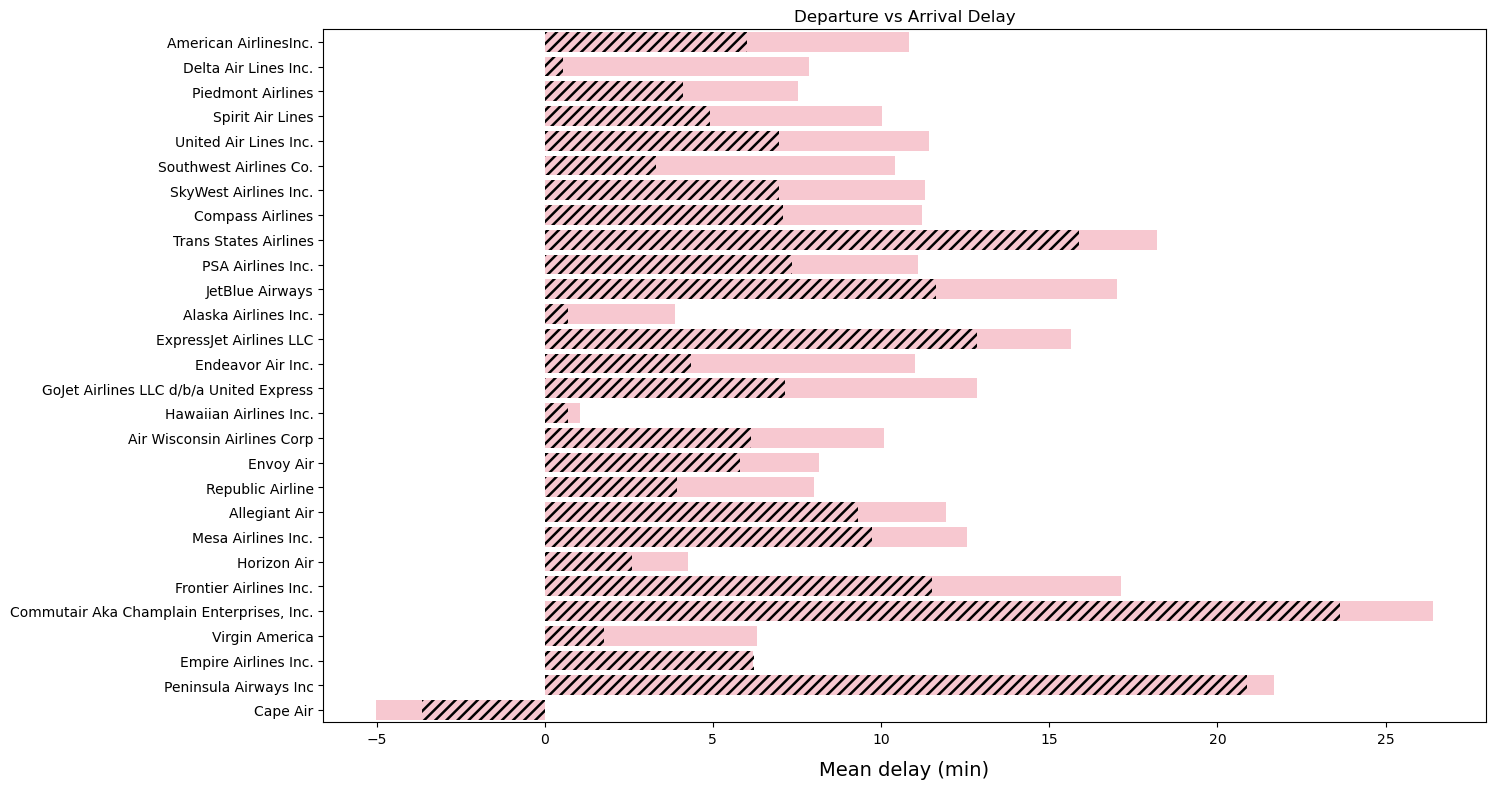

In [47]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="dep_delay", y="op_unique_carrier", data=que7, color="pink", ci=None)
ax = sns.barplot(x="arr_delay", y="op_unique_carrier", data=que7, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);
plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [48]:
full_flights_df.head(2)

,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,92.0,"Atlanta, GA","Philadelphia, PA",830.0,-2.0,1024.0,-12.0,666,1013.0,841.0,11.0,11.0,0


In [49]:
que8=full_flights_df[['op_unique_carrier','dep_time','distance']]
que8.head(2)

,op_unique_carrier,dep_time,distance
0,American AirlinesInc.,1443.0,592
1,Delta Air Lines Inc.,830.0,666


In [50]:
que8.shape

(786371, 3)

In [51]:
dis_tance = []
for i in que8['distance']:
    if i >= 2000:
        dis_tance.append('LONG')
    elif 1000 <= i <= 1999:
        dis_tance.append('MEDIUM')
    else:
        dis_tance.append('SHORT')
que8['distance_class']=dis_tance
que8.head(2).append(que8.tail(2))

,op_unique_carrier,dep_time,distance,distance_class
0,American AirlinesInc.,1443.0,592,SHORT
1,Delta Air Lines Inc.,830.0,666,SHORT
786369,Southwest Airlines Co.,1446.0,479,SHORT
786370,ExpressJet Airlines LLC,1653.0,748,SHORT


In [52]:
que8.distance_class.value_counts()


SHORT     587980
MEDIUM    154677
LONG       43714
Name: distance_class, dtype: int64

In [53]:
que8['dep_time'] = round((que8.dep_time/100))
que8.head(2)

,op_unique_carrier,dep_time,distance,distance_class
0,American AirlinesInc.,14.0,592,SHORT
1,Delta Air Lines Inc.,8.0,666,SHORT


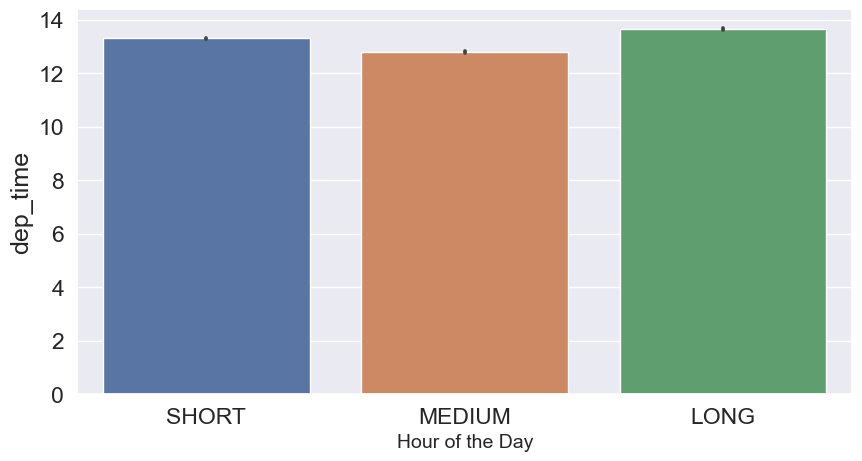

In [54]:
fig = plt.figure(1, figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.barplot(x='distance_class', y='dep_time', data=que8)
ax.set_title('', fontsize=18)
ax.set_xlabel('Hour of the Day', fontsize=14)
plt.show()

In [55]:
que8_1 = round(que8.groupby('dep_time').distance.median().sort_values(ascending=False),2).reset_index()
que8_1.head(24)

,dep_time,distance
0,24.0,1542.0
1,0.0,1448.0
2,1.0,1399.0
3,2.0,1334.0
4,3.0,1189.0
5,4.0,974.5
6,23.0,787.0
7,7.0,693.0
8,8.0,642.0
9,19.0,621.0


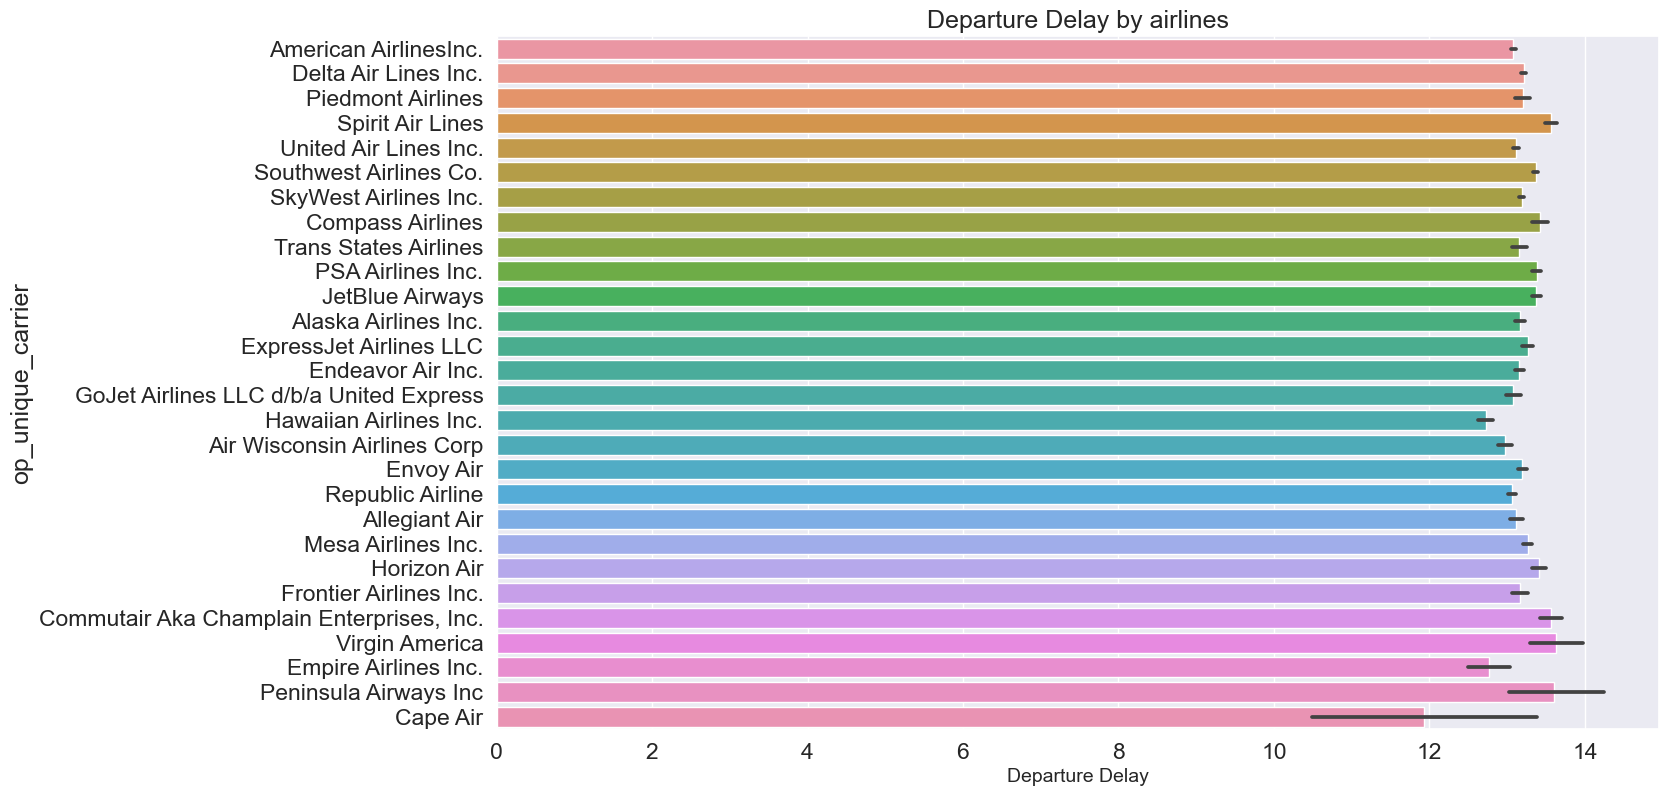

In [56]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.5)
ax = sns.barplot(x='dep_time', y='op_unique_carrier', data=que8)
ax.set_title('Departure Delay by airlines', fontsize=18)
ax.set_xlabel('Departure Delay', fontsize=14)
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [57]:
passg = pd.read_csv('/Users/kamininayyar/Downloads/passengers3.csv')
passg.tail(2)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,distance,unique_carrier_name,ramp_to_ramp,air_time,unique_carrier,carrier_name,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,year,month,class
799998,9,9,330000,1620,1397,0,1416,Frontier Airlines Inc.,1935,1725,F9,Frontier Airlines Inc.,14635,"Fort Myers, FL",13487,"Minneapolis, MN",2018,1,F
799999,9,9,332400,1620,1063,0,1299,Frontier Airlines Inc.,1767,1598,F9,Frontier Airlines Inc.,14635,"Fort Myers, FL",13871,"Omaha, NE",2018,1,F


In [67]:
data = passg.groupby('origin_airport_id').departures_performed.median().sort_values(ascending=False).reset_index()
data.rename({'origin_airport_id':'airport_id'}, axis=1, inplace=True)
data.head(2)

,airport_id,departures_performed
0,11041,190.0
1,11308,111.5


In [69]:
pass1 = round(passg.groupby('origin_airport_id').passengers.median().sort_values(ascending=False).reset_index(name="medi_ori_passenger"),2)

pass1.rename({'origin_airport_id':'airport_id'}, axis=1, inplace=True)

In [70]:
pass2 = round(passg.groupby('dest_airport_id').passengers.median().sort_values(ascending=False).reset_index(name="medi_dest_passenger"),2)
pass2.rename({'dest_airport_id':'airport_id'}, axis=1, inplace=True)

In [71]:
pss_df = pd.merge(pass1,pass2, on='airport_id')
pss_df.head(10)

,airport_id,medi_ori_passenger,medi_dest_passenger
0,14824,11958.0,12164.0
1,15258,7832.0,8465.0
2,15306,7704.5,7732.0
3,11290,7043.5,7072.5
4,10716,6928.0,7033.0
5,12520,6865.0,7364.0
6,15092,6363.5,6328.0
7,12169,6148.5,5612.5
8,13243,6096.0,6020.5
9,11625,6058.0,5976.0


In [72]:
pass_df1 = pd.merge(pss_df,data, on='airport_id')
pass_df1.head(10)

,airport_id,medi_ori_passenger,medi_dest_passenger,departures_performed
0,14824,11958.0,12164.0,59.0
1,15258,7832.0,8465.0,30.0
2,15306,7704.5,7732.0,30.0
3,11290,7043.5,7072.5,30.0
4,10716,6928.0,7033.0,29.0
5,12520,6865.0,7364.0,27.5
6,15092,6363.5,6328.0,30.0
7,12169,6148.5,5612.5,30.0
8,13243,6096.0,6020.5,28.0
9,11625,6058.0,5976.0,29.0
